# **Automatidata Project**
## Project Introduction
This notebook presents the Automatidata Project, one of the hands-on pedagogical portfolio projects I completed as part of the Google Advanced Data Analytics Professional Certificate. The project is developed incrementally across multiple courses and later assembled into a comprehensive portfolio. It simulates real-world workspace scenarios involving stakeholders and demonstrates how analytical workflows function in practice.

The goal of this project is to perform **exploratory data analysis (EDA), statistical analysis, hypothesis testing, feature engineering, and predictive modeling to generate meaningful insights and actionable predictions.**

The project uses a pedagogical New York City taxi dataset, which contains detailed information about trips, fares, and passenger behavior. Exploring this dataset helps identify key patterns, set analytical goals, and design an effective approach for modeling.

The primary tasks of project are to predict taxi fare amounts using regression models, helping us understand the factors that drive pricing, and to classify tipping behavior with tree-based models, determining whether passengers are likely to leave a high or low tip.

## Plan Phase:

### Parties Involved:
**Automatidata** is data cunsulting firm that works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client's business needs and utilizing their data to meet those business needs.

Automatidata is consulting for the **New York City Taxi and Limousine Commission (TLC)**. New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata.
### Bussiness Agenda:
*Analyze large-scale New York City taxi trip data to identify key patterns and quantify feature collerations. Develop and evaluate regression models to estimate taxi fares before a ride begins and classsifications models to predict whether customer leaves big tip or not*
### Project Stackholders:
Internal stackholders, Automatidata team members:
* Udo Bankole, Director of Data Analysis
* Deshawn Washington, Data Analysis Manager
* Luana Rodriquez, Senior Data Analyst
* Uli King, Senior Project Manager

External stackolders, New York City TLC team members:
* Juliana Soto, Finance and Administration Department Head
* Titus Nelson, Operations Manager
### Data Source:
The dataset is publicly available on Kaggle and is used as part of the Google Advanced Data Analytics Professional Certificate. This project's dataset was created for pedagogical purposes and may not be indicative of New York City taxi cab riders' behavior.

In scenario, The New York City Taxi and Limousine Commission (TLC) is the regulatory agency responsible for licensing and overseeing New York City’s taxi cabs and for-hire vehicles. The TLC has partnered with Automatidata to develop a regression model for estimating taxi fares prior to a trip, using historical trip data collected by the agency.

The dataset is derived from records of over 200,000 licensed taxi and limousine drivers, collectively generating approximately one million trips per day.
### Project Proposal:
The project proposal can be viewed here.
### Ethical Considerations:
In this project, it is crucial to handle data responsibly and ensure ethical practices throughout the analysis. Although the TLC dataset used is fictional and created for pedagogical purposes, real-world taxi data often contains sensitive information, such as trip locations, passenger behaviors, and payment details. Ethical considerations include protecting privacy by avoiding identification of individual riders or drivers, ensuring data security, and using data only for the ethically intended purpose. 

The project also requires transparent and unbiased modeling, avoiding any assumptions or features that could introduce unfairness or discrimination in predictions. Furthermore, all insights and recommendations must be communicated accurately and responsibly, ensuring that stakeholders are not misled by incomplete or misinterpreted results. By adhering to these principles, the project aligns with responsible data science practices and maintains trustworthiness in its analytical outputs.
### Data Dictionary:
| Field Name | Description |
| :--- | :--- |
| **Unnamed: 0** | A record identifier/index from the original dataset. |
| **VendorID** | A code indicating the TPEP provider that provided the record. |
| **tpep_pickup_datetime** | The date and time when the meter was engaged. |
| **tpep_dropoff_datetime** | The date and time when the meter was disengaged. |
| **passenger_count** | The number of passengers in the vehicle (driver-entered value). |
| **trip_distance** | The elapsed trip distance in miles reported by the taximeter. |
| **RatecodeID** | The final rate code in effect at the end of the trip. |
| **store_and_fwd_flag** | Whether the trip record was held in vehicle memory before sending. |
| **PULocationID** | TLC Taxi Zone in which the taximeter was engaged (Pickup). |
| **DOLocationID** | TLC Taxi Zone in which the taximeter was disengaged (Drop-off). |
| **payment_type** | A numeric code signifying how the passenger paid. |
| **fare_amount** | The time-and-distance fare calculated by the meter. |
| **extra** | Miscellaneous extras and surcharges. |
| **mta_tax** | $0.50 MTA tax that is automatically triggered based on the metered rate in use. |
| **tip_amount** | Tip amount – Note: This field is automatically populated for credit card tips; cash tips are not included. |
| **tolls_amount** | Total amount of all tolls paid in trip. |
| **improvement_surcharge** | $0.30 improvement surcharge assessed on hailed trips. |
| **total_amount** | The total amount charged to passengers. Does not include cash tips. |



## Analysis Phase:

### Exploratory Data Analysis (EDA)
Let's import library and packages for EDA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats

In [3]:
# loading the dataset
df = pd.read_csv(r'G:\Analytics Projects\NYC-taxi-fare-prediction\data\2017_Yellow_Taxi_Trip_Data.csv')
print('Data is loaded successfully!')

Data is loaded successfully!


#### Discovering

In [ ]:
# exploring first 10 rows of the dataset
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [ ]:
# exploring the last 10 rows of the dataset
df.tail(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
22689,19137636,2,03/07/2017 12:25:52 PM,03/07/2017 12:39:40 PM,1,1.96,1,N,113,13,1,11.0,0.0,0.5,2.36,0.00,0.3,14.16
22690,79394312,2,09/21/2017 1:44:42 PM,09/21/2017 1:52:06 PM,1,0.89,1,N,43,142,1,7.0,0.0,0.5,1.95,0.00,0.3,9.75
22691,112546155,2,01/06/2017 1:50:14 AM,01/06/2017 1:56:47 AM,1,2.12,1,N,170,79,1,8.0,0.5,0.5,0.00,0.00,0.3,9.30
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00
22698,17208911,1,03/02/2017 1:02:49 PM,03/02/2017 1:16:09 PM,1,2.10,1,N,239,236,1,11.0,0.0,0.5,2.35,0.00,0.3,14.15


In [ ]:
# exploring the shape of the dataset
df.shape

(22699, 18)

The dataset has 22699 observations and 18 features.

In [ ]:
# retrieving some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Luckily, there's no null values in the dataset.

In [ ]:
# genrating descriptive statistics
df.describe(include = 'all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,04/15/2017 6:05:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


Let's investigate extremes for `total_amount` and `trip_distance` variables.

In [ ]:
# sorting the dataset based on total_amount from highest to lowest
df_sorted_1 = df.sort_values(by='total_amount', ascending=False)
df_sorted_1.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


In [ ]:
# extracting unusual values in total_amount and trip_distance columns from the sorted dataset
df_sorted_1[['total_amount', 'trip_distance']].head(10)

,total_amount,trip_distance
8476,1200.29,2.60
20312,450.30,0.00
13861,258.21,33.92
12511,233.74,0.00
15474,211.80,0.00
6064,179.06,32.72
16379,157.06,25.50
3582,152.30,7.30
11269,151.82,0.00
9280,150.30,33.96


In [ ]:
# viewing tail of the extracted unusual values
df_sorted_1[['total_amount', 'trip_distance']].tail(10)

,total_amount,trip_distance
10281,-4.3,0.00
5448,-4.3,0.25
4423,-4.3,0.06
8204,-4.8,0.41
20317,-4.8,0.24
11204,-5.3,0.64
14714,-5.3,0.40
20698,-5.8,0.70
17602,-5.8,0.46
12944,-120.3,0.17


In [ ]:
# sorting the dataset based on trip_distance from highest to lowest
df_sorted_2 = df.sort_values(by='trip_distance', ascending=False)
df_sorted_2.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


In [ ]:
# viewing the tail of the sorted dataset based on trip_distance
df_sorted_2.tail(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
20042,37983307,1,05/04/2017 8:39:04 PM,05/04/2017 8:39:13 PM,4,0.0,1,N,233,233,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80
4910,102878623,1,12/05/2017 1:04:45 PM,12/05/2017 1:05:00 PM,1,0.0,2,N,162,162,1,52.0,0.0,0.5,11.70,5.76,0.3,70.26
3865,53536625,2,06/23/2017 2:43:42 PM,06/23/2017 2:51:15 PM,6,0.0,1,N,13,13,2,6.0,0.0,0.5,0.00,0.00,0.3,6.80
5630,6520188,1,01/29/2017 8:16:21 PM,01/29/2017 8:16:21 PM,1,0.0,1,N,132,264,2,39.5,0.5,0.5,0.00,0.00,0.3,40.80
11700,705470,2,01/03/2017 12:26:09 PM,01/03/2017 12:27:07 PM,1,0.0,2,N,24,24,1,52.0,0.0,0.5,0.00,5.54,0.3,58.34
4171,12399699,1,02/16/2017 8:37:04 PM,02/16/2017 8:37:04 PM,1,0.0,1,N,238,264,2,9.5,0.5,0.5,0.00,0.00,0.3,10.80
20638,106367018,1,12/15/2017 4:09:43 PM,12/15/2017 4:09:43 PM,1,0.0,1,N,43,264,2,2.5,1.0,0.5,0.00,0.00,0.3,4.30
14372,108639975,1,12/22/2017 1:39:55 PM,12/22/2017 1:44:23 PM,1,0.0,1,N,226,226,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
1350,91619825,2,10/30/2017 8:20:29 AM,10/30/2017 8:20:38 AM,1,0.0,1,N,193,193,1,2.5,0.0,0.5,0.66,0.00,0.3,3.96
22670,17852208,1,03/03/2017 11:09:16 PM,03/03/2017 11:09:35 PM,1,0.0,1,N,132,132,3,2.5,0.5,0.5,0.00,0.00,0.3,3.80


In [ ]:
# viewing tail of the extracted unusual values
df_sorted_2[['total_amount', 'trip_distance']].tail(10)

,total_amount,trip_distance
20042,3.80,0.0
4910,70.26,0.0
3865,6.80,0.0
5630,40.80,0.0
11700,58.34,0.0
4171,10.80,0.0
20638,4.30,0.0
14372,5.30,0.0
1350,3.96,0.0
22670,3.80,0.0


**Summary**: There are some unusual values which may be `outliers` in the dataset.

Let's investigate class distribution of `payment_type` feature.

In [ ]:
# computing class distribution of payment_type feature
df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

The `1` (credit card) and `2` (cash) are major classes. The `payment_type` feature is inbalanced.

In [ ]:
# computing the mean tip_amount for each payment_type
df.groupby('payment_type')['tip_amount'].mean()

payment_type
1    2.7298
2    0.0000
3    0.0000
4    0.0000
Name: tip_amount, dtype: float64

Customers give tips only when payments are made using credit cards.

Let's investigate class distribution of `VendorID` feature.

In [ ]:
# computing the class distribution of VendorID feature
df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

The distribution of the `VendorID` feature is approximately even.

In [ ]:
# computing the mean total_amount for each VendorID
df.groupby('VendorID')['total_amount'].mean()

VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

The mean `total_amount` for each `VendorID` classes is approximately even.

Let's investigate dataset with payments done with credit cards.

In [ ]:
# filtering the dataset for credit card payments only
df_credit_card = df[df['payment_type'] == 1]

# computing class distribution of passenger_count (credit card payments only)
df_credit_card['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

In [ ]:
# computing the mean tip_amount for each passenger_count (credit card payments only)
df_credit_card.groupby('passenger_count')['tip_amount'].mean()

passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64

The mean `tip_amount` for each `passenger_count` shows not much variation.

let's investigate `DOLocationID` feature.

In [13]:
# getting number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [14]:
# checking if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

np.int64(49)

There are 49 numbers that do not represent a drop-off location. 

#### Cleaning:

The `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns are in `object` dtypes. Let's convert them into `datetime` dtypes.

In [5]:
# converting tpep_pickup_datetime and tpep_dropoff_datetime columns to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

#### Structuring:

Create `month` and `day`columns

In [6]:
# creating a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# creating a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

Creating `trip_duration` column

In [7]:
# creating a trip_duration column
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

#### Joining

The dataset has no null values. However, the `DOLocationID` is not consecutively numbered. Due to the lack of additional information, we will proceed to the next stage.

#### Validating

In [27]:
# checking  dataset info before further analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

The dataset is ready to be presented.

#### Presenting

##### Univariate analysis:
`trip_distance`

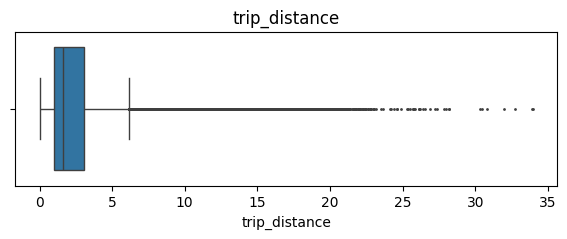

In [ ]:
# creating box plot for trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

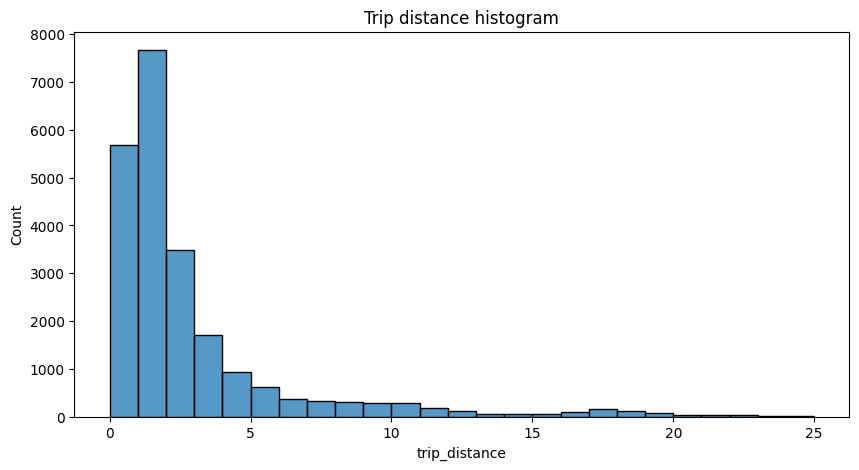

In [ ]:
# creating histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

`total_amount`

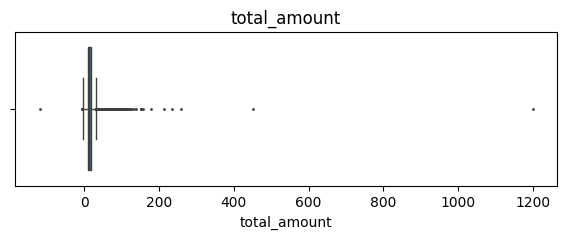

In [47]:
# createing box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

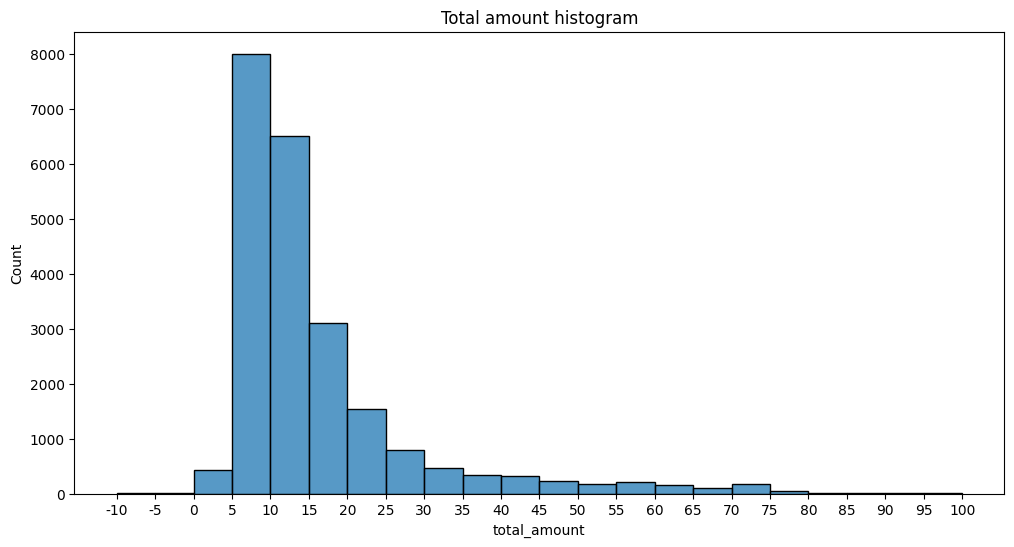

In [48]:
# Creating histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

The distribution for total_amount is right-skewed, with most costs falling in the $5-15 range.

`tip_amount`

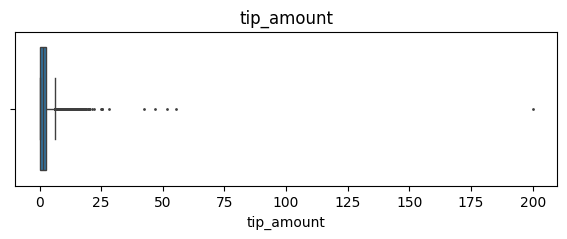

In [45]:
# creating box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

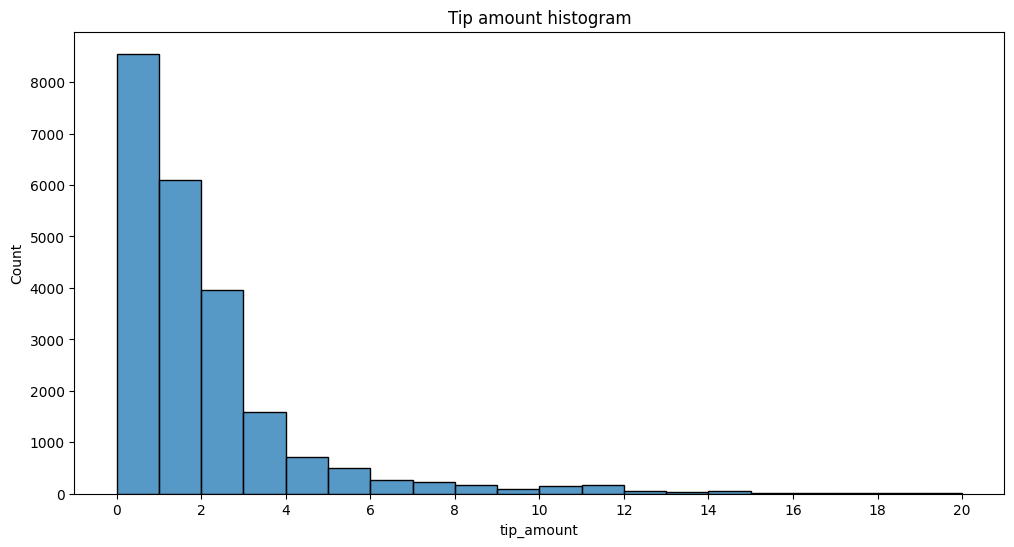

In [46]:
# creating histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

`month`

In [24]:
# getting total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

The months are out of order.

Reorder the results to put the months in calender order.

In [25]:
# reordering the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

C:\Users\sabar\AppData\Local\Temp\ipykernel_18936\1902470215.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


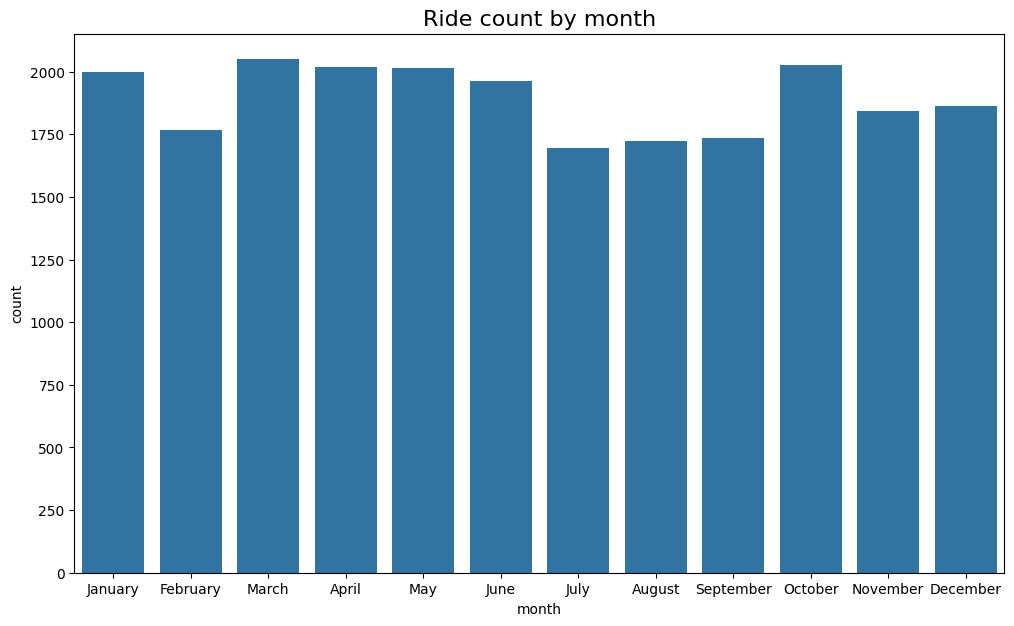

In [36]:
# creating a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

`day`

In [37]:
# repeating the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

C:\Users\sabar\AppData\Local\Temp\ipykernel_18936\950733338.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


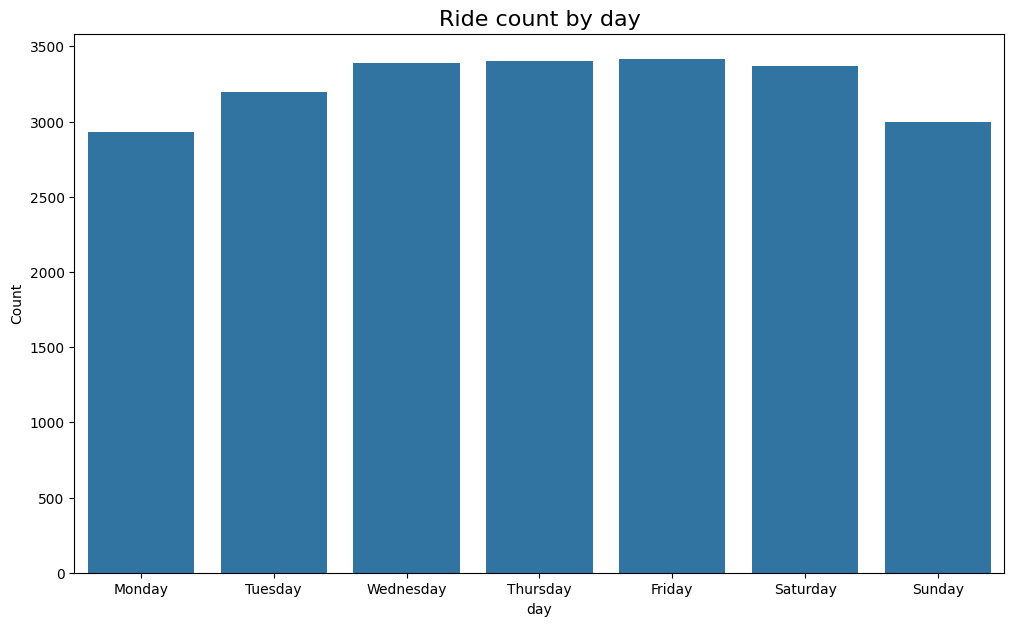

In [38]:
# creating bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

`DOLocationID`

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other.

In [19]:
# DOLocationID column is numeric, so sorting in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# converting to string
sorted_dropoffs = sorted_dropoffs.astype('str')

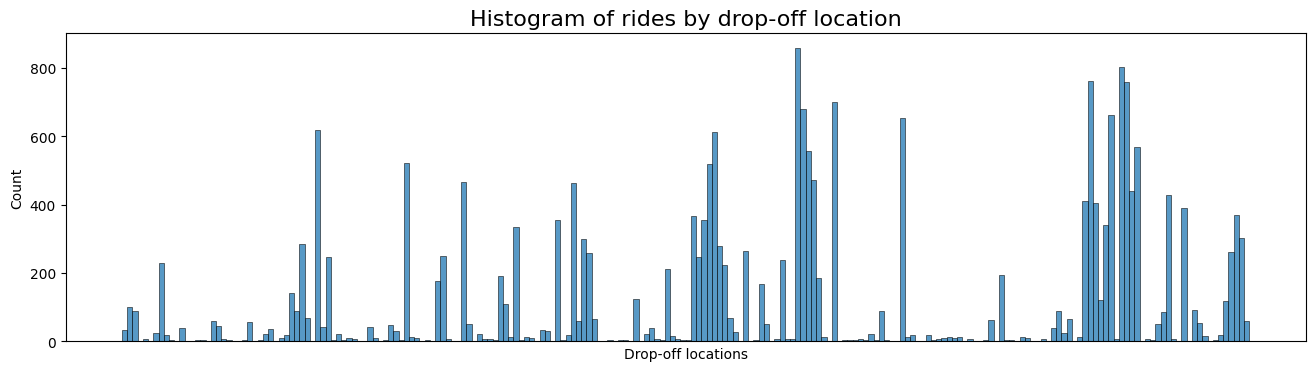

In [22]:
plt.figure(figsize=(16,4))
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

##### Bivariant Analysis

`tip_amount` and `VendorID`

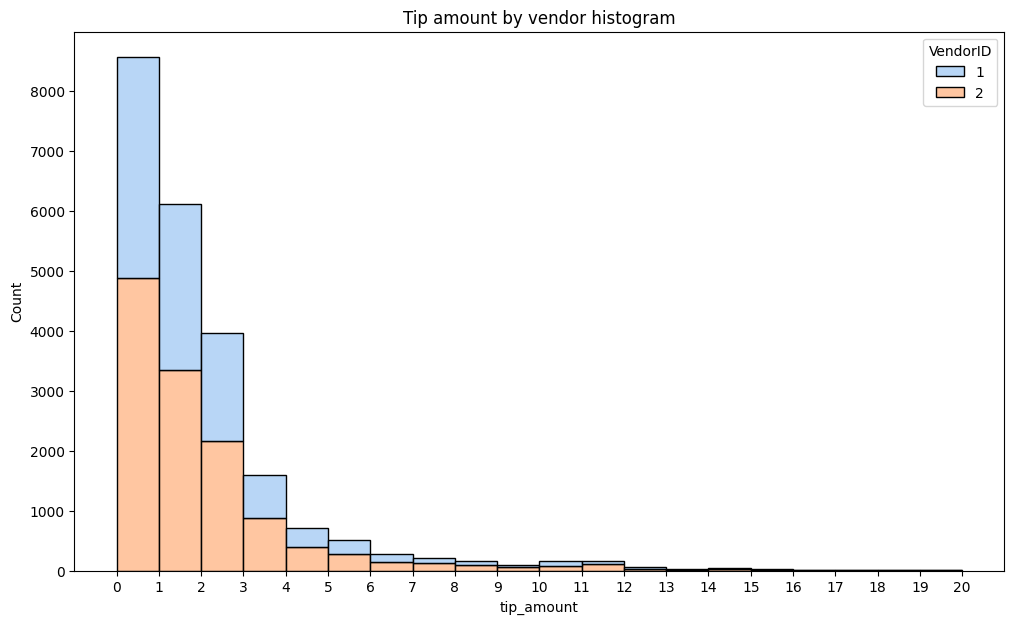

In [49]:
# creating histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, let's zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

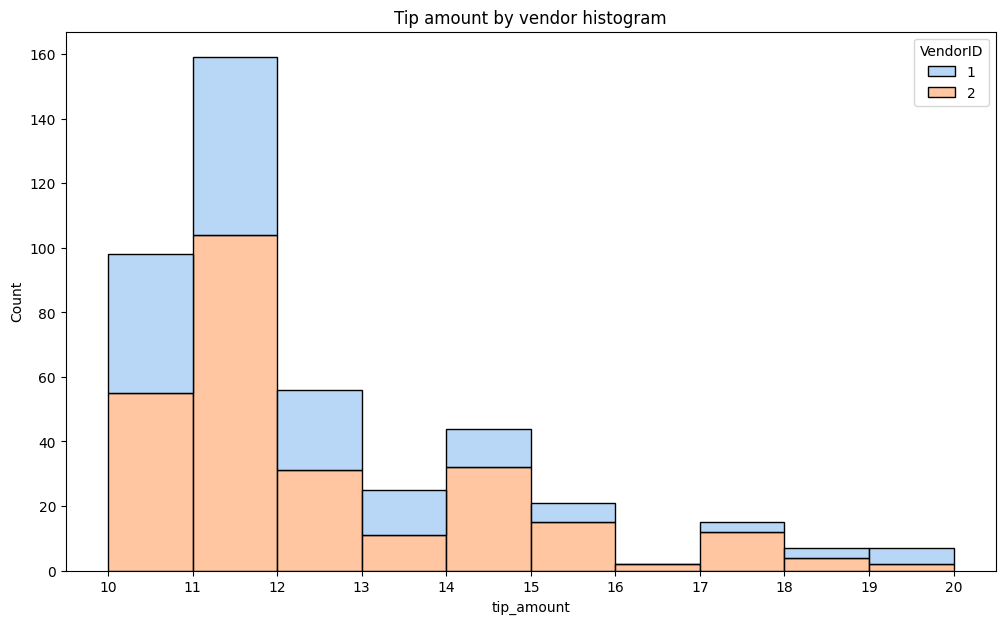

In [50]:
# creating histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

`Mean tip` and `passenger_count`

In [25]:
# computing mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count'])[['total_amount', 'tip_amount']].mean()[['tip_amount']]
mean_tips_by_passenger_count


,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


C:\Users\sabar\AppData\Local\Temp\ipykernel_18936\3064444391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,


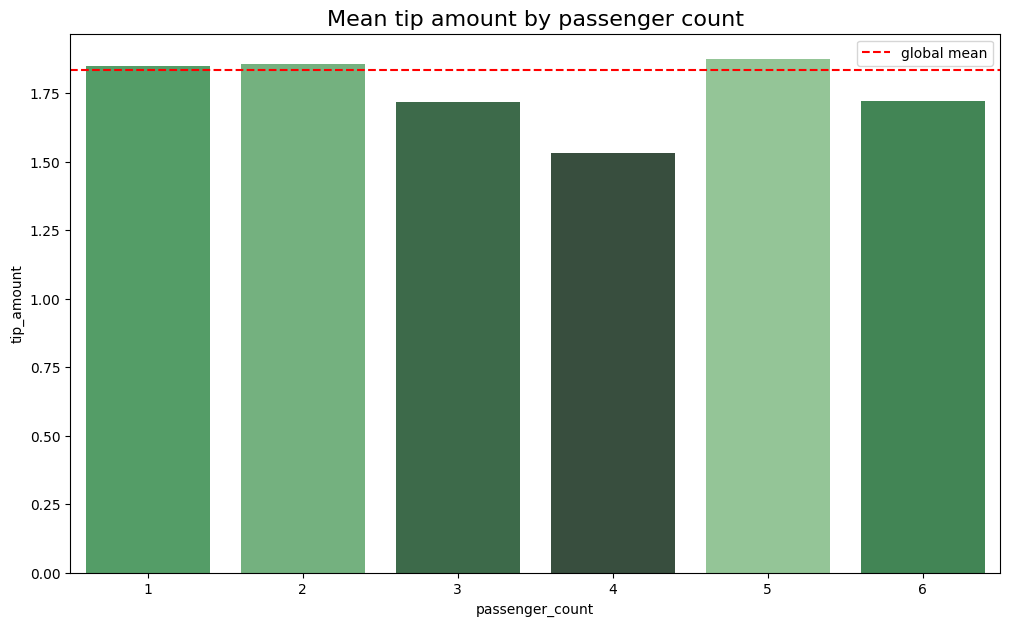

In [29]:
# creating bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=list(np.array(pal[::-1])[rank]))
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

`month` and `total_amount`

Plot total revenue by month

In [7]:
# creating dataframe for visualization
total_amount_month = df.groupby('month')[['total_amount','passenger_count']].sum()[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


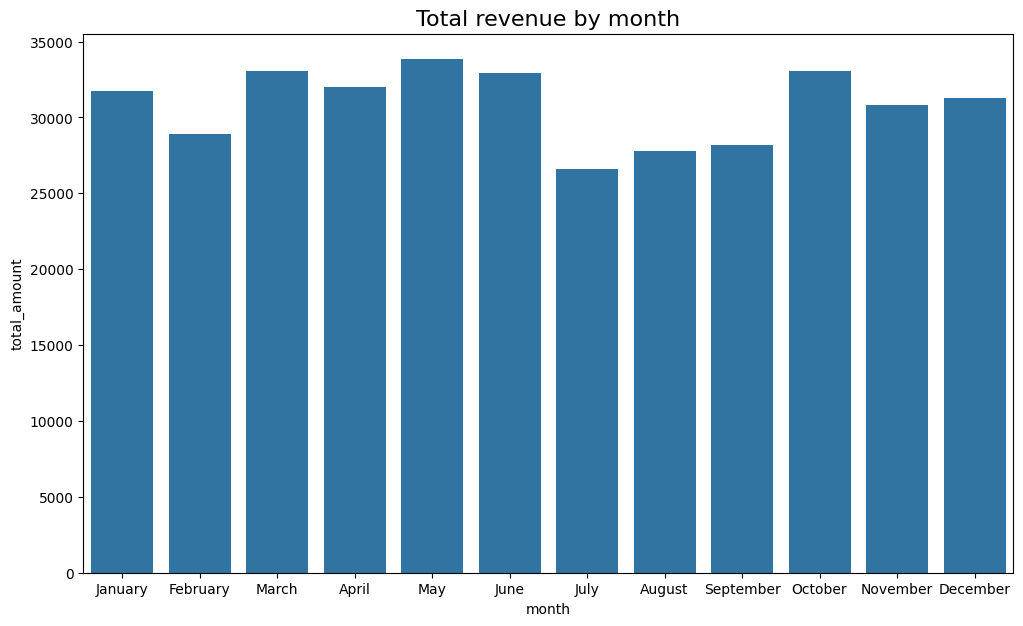

In [9]:
# creating a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

`day` and `total_amount`

Plot total revenue by day of the week

In [ ]:
# repeating the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')[['total_amount','passenger_count']].sum()[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


C:\Users\sabar\AppData\Local\Temp\ipykernel_11776\3340777660.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


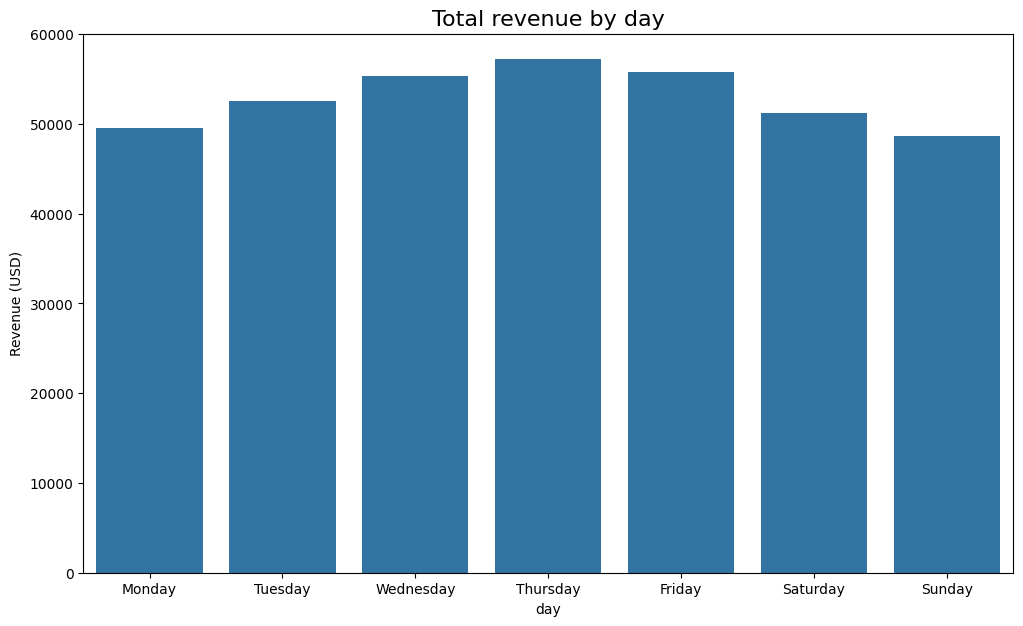

In [12]:
# creating bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's&mdash;more than a 10% drop.

`DOLocationID` and `trip_distance`

In [16]:
# calculating the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')[['trip_distance','passenger_count']].mean()[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


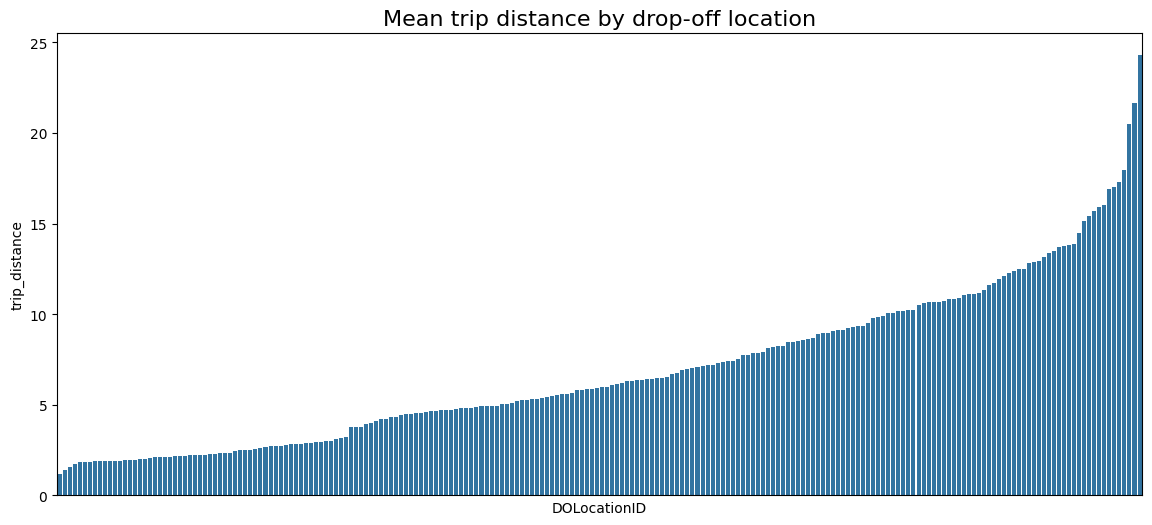

In [17]:
# creating a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations. 

### Hypothesis Test

Let's investigate relationships between `payment_type` and `fare_amount`

In [29]:
# getting mean fare amount by payment type
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

We know that class `1` (credit card) and `2` (cash) are major classes. Experimentally, we can investigate whether their mean difference is statistically significant using A/B testing.

let's state null hypothesis and alternative hypothesis:

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

here, we choose 5% as the significance level and proceed with a two-sample t-test.

In [8]:
#hypothesis test, A/B test

credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

TtestResult(statistic=np.float64(6.866800855655361), pvalue=np.float64(6.797387473031004e-12), df=np.float64(16675.48547403633))

Since the p-value is significantly smaller than the significance level of 5%, you reject the null hypothesis. 

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

## Construct Phase